In [96]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
city_ride_df = pd.merge(ride_df,city_df, how='left', on='city')
# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

<function matplotlib.pyplot.show(*args, **kw)>

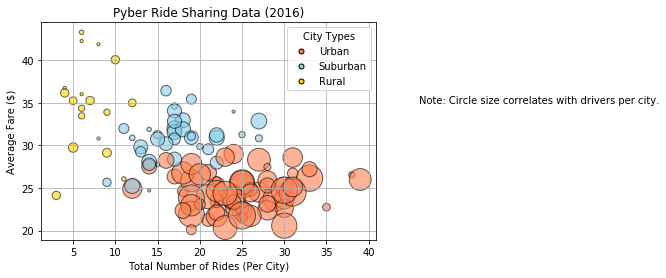

In [97]:
cities_group = city_ride_df.groupby('city').agg({'fare': 'mean',
                                                 'ride_id':'count',
                                                 'driver_count': 'max',
                                                 'type': 'max'})

cities_renamed = cities_group.rename(columns={"fare": "Avg_Fare",
                                              "ride_id": "Rider_Count",
                                              "driver_count": "Drivers",
                                              "type": "Type"}) 

col_dict = {'Urban':'coral', 'Suburban':'Skyblue', 'Rural':'gold'} 

cities_renamed['Color'] = cities_renamed['Type'].map(col_dict) 


plt.scatter(cities_renamed.Rider_Count, cities_renamed.Avg_Fare, 
            s=[cities_renamed.Drivers*10], 
            c=cities_renamed.Color, marker='o', 
            alpha=.6, edgecolors="black", 
            label=cities_renamed.Color)

plt.xlabel("Total Number of Rides (Per City)") 
plt.ylabel("Average Fare ($)") 
plt.title("Pyber Ride Sharing Data (2016)") 
plt.grid()

colors_list= list(cities_renamed['Color'].unique()) 
type_list=list(cities_renamed['Type'].unique()) 

patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec="Black", color=colors_list[i], 
            label="{:s}".format(type_list[i]) )[0]  for i in range(len(type_list)) ]

plt.legend(title="City Types", handles=patches, loc="upper right",)

plt.figtext(1,0.6, "Note: Circle size correlates with drivers per city.")

plt.show

## Total Fares by City Type

<function matplotlib.pyplot.savefig(*args, **kwargs)>

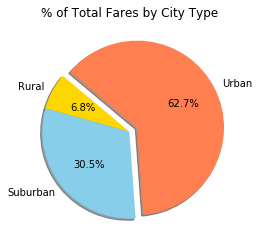

In [98]:
# Calculate Type Percents

tot_fares = city_ride_df['fare'].sum()
type_df = city_ride_df.groupby('type')
type_fares = type_df['fare'].sum()
fare_perc = (type_fares/tot_fares)*100

# Build Pie Chart
labels = city_ride_df['type'].unique()
Colors = ["gold", "Skyblue", "coral"]
explode = (0, 0, 0.1)
plt.pie(fare_perc, colors=colors, labels=sorted(labels), 
        explode=explode, autopct="%1.1f%%", 
        shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.show
# Save Figure
plt.savefig

## Total Rides by City Type

<function matplotlib.pyplot.savefig(*args, **kwargs)>

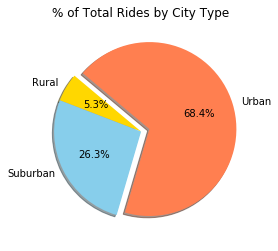

In [99]:
# Calculate Ride Percents

tot_rides = city_ride_df['fare'].count()
type_df = city_ride_df.groupby('type')
type_rides = type_df['fare'].count()
ride_perc = (type_rides/tot_rides)*100

# Build Pie Chart
labels = city_ride_df['type'].unique()
Colors = ["gold", "Skyblue", "coral"]
explode = (0, 0, 0.1)
plt.pie(ride_perc, colors=colors, labels=sorted(labels), 
        explode=explode, autopct="%1.1f%%", 
        shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

plt.show
# Save Figure
plt.savefig

## Total Drivers by City Type

<function matplotlib.pyplot.savefig(*args, **kwargs)>

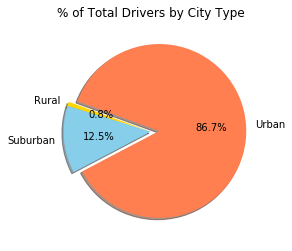

In [100]:
# Calculate Driver Percents
tot_drivers = city_ride_df['driver_count'].sum()
type_df = city_ride_df.groupby('type')
type_drivers = type_df['driver_count'].sum()
driver_perc = (type_drivers/tot_drivers)*100

# Build Pie Charts
labels = city_ride_df['type'].unique()
Colors = ["gold", "Skyblue", "coral"]
explode = (0, 0, 0.1)
plt.pie(driver_perc, colors=colors, labels=sorted(labels), 
        explode=explode, autopct="%1.1f%%", 
        shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type")

plt.show
#Save Figure
plt.savefig